In [1]:
import numpy as np
import pandas as pd 
import os
import glob
import time
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
test = 'C:/Users/saini/Desktop/new project/myData/test'
train = 'C:/Users/saini/Desktop/new project/myData/train'
no_of_frames = 160                                                             # Number of Frames
epochs = 3                                                                     # Number of epochs
batch_size = 10                                                                # Batch Size
n_classes =  43                                                                  # Patience for EarlyStopping
stime = int(time.time())                                                       # Defining Starting Time
categories = os.listdir(train)  

In [3]:
print(categories)

['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '5', '6', '7', '8', '9']


In [4]:
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.applications.efficientnet_v2 import preprocess_input

In [5]:
 base_model = EfficientNetB3(weights = 'imagenet', include_top = False, input_shape = (224, 224, 3))

In [6]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation = 'relu')(x)
x = Dropout(0.5)(x)
# x = Dense(512, activation = 'relu')(x)
# x = Dense(256, activation = 'relu')(x)
preds = Dense(n_classes, activation = 'softmax')(x)

In [7]:
model = Model(inputs = base_model.input, outputs = preds)
for i, layer in enumerate(model.layers):
    print(i, layer.name)

0 input_1
1 rescaling
2 normalization
3 rescaling_1
4 stem_conv_pad
5 stem_conv
6 stem_bn
7 stem_activation
8 block1a_dwconv
9 block1a_bn
10 block1a_activation
11 block1a_se_squeeze
12 block1a_se_reshape
13 block1a_se_reduce
14 block1a_se_expand
15 block1a_se_excite
16 block1a_project_conv
17 block1a_project_bn
18 block1b_dwconv
19 block1b_bn
20 block1b_activation
21 block1b_se_squeeze
22 block1b_se_reshape
23 block1b_se_reduce
24 block1b_se_expand
25 block1b_se_excite
26 block1b_project_conv
27 block1b_project_bn
28 block1b_drop
29 block1b_add
30 block2a_expand_conv
31 block2a_expand_bn
32 block2a_expand_activation
33 block2a_dwconv_pad
34 block2a_dwconv
35 block2a_bn
36 block2a_activation
37 block2a_se_squeeze
38 block2a_se_reshape
39 block2a_se_reduce
40 block2a_se_expand
41 block2a_se_excite
42 block2a_project_conv
43 block2a_project_bn
44 block2b_expand_conv
45 block2b_expand_bn
46 block2b_expand_activation
47 block2b_dwconv
48 block2b_bn
49 block2b_activation
50 block2b_se_squeez

In [8]:
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 rescaling_1 (Rescaling)        (None, 224, 224, 3)  0           ['normalization[0][0]']      

 block2a_expand_conv (Conv2D)   (None, 112, 112, 14  3456        ['block1b_add[0][0]']            
                                4)                                                                
                                                                                                  
 block2a_expand_bn (BatchNormal  (None, 112, 112, 14  576        ['block2a_expand_conv[0][0]']    
 ization)                       4)                                                                
                                                                                                  
 block2a_expand_activation (Act  (None, 112, 112, 14  0          ['block2a_expand_bn[0][0]']      
 ivation)                       4)                                                                
                                                                                                  
 block2a_dwconv_pad (ZeroPaddin  (None, 113, 113, 14  0          ['block2a_expand_activation[0][0]
 g2D)     

 ivation)                                                                                         
                                                                                                  
 block2c_dwconv (DepthwiseConv2  (None, 56, 56, 192)  1728       ['block2c_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block2c_bn (BatchNormalization  (None, 56, 56, 192)  768        ['block2c_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block2c_activation (Activation  (None, 56, 56, 192)  0          ['block2c_bn[0][0]']             
 )                                                                                                
          

                                                                                                  
 block3b_activation (Activation  (None, 28, 28, 288)  0          ['block3b_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block3b_se_squeeze (GlobalAver  (None, 288)         0           ['block3b_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block3b_se_reshape (Reshape)   (None, 1, 1, 288)    0           ['block3b_se_squeeze[0][0]']     
                                                                                                  
 block3b_se_reduce (Conv2D)     (None, 1, 1, 12)     3468        ['block3b_se_reshape[0][0]']     
          

 )                                                                                                
                                                                                                  
 block4a_se_squeeze (GlobalAver  (None, 288)         0           ['block4a_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block4a_se_reshape (Reshape)   (None, 1, 1, 288)    0           ['block4a_se_squeeze[0][0]']     
                                                                                                  
 block4a_se_reduce (Conv2D)     (None, 1, 1, 12)     3468        ['block4a_se_reshape[0][0]']     
                                                                                                  
 block4a_se_expand (Conv2D)     (None, 1, 1, 288)    3744        ['block4a_se_reduce[0][0]']      
          

                                                                                                  
 block4c_se_excite (Multiply)   (None, 14, 14, 576)  0           ['block4c_activation[0][0]',     
                                                                  'block4c_se_expand[0][0]']      
                                                                                                  
 block4c_project_conv (Conv2D)  (None, 14, 14, 96)   55296       ['block4c_se_excite[0][0]']      
                                                                                                  
 block4c_project_bn (BatchNorma  (None, 14, 14, 96)  384         ['block4c_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block4c_drop (Dropout)         (None, 14, 14, 96)   0           ['block4c_project_bn[0][0]']     
          

                                                                                                  
 block4e_project_bn (BatchNorma  (None, 14, 14, 96)  384         ['block4e_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block4e_drop (Dropout)         (None, 14, 14, 96)   0           ['block4e_project_bn[0][0]']     
                                                                                                  
 block4e_add (Add)              (None, 14, 14, 96)   0           ['block4e_drop[0][0]',           
                                                                  'block4d_add[0][0]']            
                                                                                                  
 block5a_expand_conv (Conv2D)   (None, 14, 14, 576)  55296       ['block4e_add[0][0]']            
          

                                                                                                  
 block5c_expand_bn (BatchNormal  (None, 14, 14, 816)  3264       ['block5c_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block5c_expand_activation (Act  (None, 14, 14, 816)  0          ['block5c_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block5c_dwconv (DepthwiseConv2  (None, 14, 14, 816)  20400      ['block5c_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block5c_b

 ivation)                                                                                         
                                                                                                  
 block5e_dwconv (DepthwiseConv2  (None, 14, 14, 816)  20400      ['block5e_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block5e_bn (BatchNormalization  (None, 14, 14, 816)  3264       ['block5e_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block5e_activation (Activation  (None, 14, 14, 816)  0          ['block5e_bn[0][0]']             
 )                                                                                                
          

                                                                                                  
 block6b_activation (Activation  (None, 7, 7, 1392)  0           ['block6b_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block6b_se_squeeze (GlobalAver  (None, 1392)        0           ['block6b_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6b_se_reshape (Reshape)   (None, 1, 1, 1392)   0           ['block6b_se_squeeze[0][0]']     
                                                                                                  
 block6b_se_reduce (Conv2D)     (None, 1, 1, 58)     80794       ['block6b_se_reshape[0][0]']     
          

 agePooling2D)                                                                                    
                                                                                                  
 block6d_se_reshape (Reshape)   (None, 1, 1, 1392)   0           ['block6d_se_squeeze[0][0]']     
                                                                                                  
 block6d_se_reduce (Conv2D)     (None, 1, 1, 58)     80794       ['block6d_se_reshape[0][0]']     
                                                                                                  
 block6d_se_expand (Conv2D)     (None, 1, 1, 1392)   82128       ['block6d_se_reduce[0][0]']      
                                                                                                  
 block6d_se_excite (Multiply)   (None, 7, 7, 1392)   0           ['block6d_activation[0][0]',     
                                                                  'block6d_se_expand[0][0]']      
          

                                                                                                  
 block6f_se_expand (Conv2D)     (None, 1, 1, 1392)   82128       ['block6f_se_reduce[0][0]']      
                                                                                                  
 block6f_se_excite (Multiply)   (None, 7, 7, 1392)   0           ['block6f_activation[0][0]',     
                                                                  'block6f_se_expand[0][0]']      
                                                                                                  
 block6f_project_conv (Conv2D)  (None, 7, 7, 232)    322944      ['block6f_se_excite[0][0]']      
                                                                                                  
 block6f_project_bn (BatchNorma  (None, 7, 7, 232)   928         ['block6f_project_conv[0][0]']   
 lization)                                                                                        
          

                                                                                                  
 block7b_drop (Dropout)         (None, 7, 7, 384)    0           ['block7b_project_bn[0][0]']     
                                                                                                  
 block7b_add (Add)              (None, 7, 7, 384)    0           ['block7b_drop[0][0]',           
                                                                  'block7a_project_bn[0][0]']     
                                                                                                  
 top_conv (Conv2D)              (None, 7, 7, 1536)   589824      ['block7b_add[0][0]']            
                                                                                                  
 top_bn (BatchNormalization)    (None, 7, 7, 1536)   6144        ['top_conv[0][0]']               
                                                                                                  
 top_activ

In [9]:
# Setting each layer as trainable
for layer in model.layers:
    layer.trainable = True

In [10]:
# Defining Image Data Generators
train_datagenerator = ImageDataGenerator(preprocessing_function = preprocess_input,
                                         validation_split = 0.2)

test_datagenerator = ImageDataGenerator(preprocessing_function = preprocess_input)

train_generator = train_datagenerator.flow_from_directory(train,
                                                          target_size = (224, 224),
                                                          color_mode = 'rgb',
                                                          batch_size = batch_size,
                                                          class_mode = 'categorical',
                                                          shuffle = True)

validation_generator = train_datagenerator.flow_from_directory(train,
                                                               target_size = (224, 224),
                                                               color_mode = 'rgb',
                                                               batch_size = batch_size,
                                                               class_mode = 'categorical',
                                                               subset = 'validation')

test_generator = test_datagenerator.flow_from_directory(test,
                                                        target_size = (224, 224),
                                                        color_mode = 'rgb',
                                                        class_mode = 'categorical')

Found 6880 images belonging to 43 classes.
Found 1376 images belonging to 43 classes.
Found 860 images belonging to 43 classes.


In [11]:
print(train_generator.class_indices)
print(validation_generator.class_indices)
print(test_generator.class_indices)

{'0': 0, '1': 1, '10': 2, '11': 3, '12': 4, '13': 5, '14': 6, '15': 7, '16': 8, '17': 9, '18': 10, '19': 11, '2': 12, '20': 13, '21': 14, '22': 15, '23': 16, '24': 17, '25': 18, '26': 19, '27': 20, '28': 21, '29': 22, '3': 23, '30': 24, '31': 25, '32': 26, '33': 27, '34': 28, '35': 29, '36': 30, '37': 31, '38': 32, '39': 33, '4': 34, '40': 35, '41': 36, '42': 37, '5': 38, '6': 39, '7': 40, '8': 41, '9': 42}
{'0': 0, '1': 1, '10': 2, '11': 3, '12': 4, '13': 5, '14': 6, '15': 7, '16': 8, '17': 9, '18': 10, '19': 11, '2': 12, '20': 13, '21': 14, '22': 15, '23': 16, '24': 17, '25': 18, '26': 19, '27': 20, '28': 21, '29': 22, '3': 23, '30': 24, '31': 25, '32': 26, '33': 27, '34': 28, '35': 29, '36': 30, '37': 31, '38': 32, '39': 33, '4': 34, '40': 35, '41': 36, '42': 37, '5': 38, '6': 39, '7': 40, '8': 41, '9': 42}
{'0': 0, '1': 1, '10': 2, '11': 3, '12': 4, '13': 5, '14': 6, '15': 7, '16': 8, '17': 9, '18': 10, '19': 11, '2': 12, '20': 13, '21': 14, '22': 15, '23': 16, '24': 17, '25': 18, 

In [12]:
# Compiling the Model
model.compile(optimizer = "Adam",
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

In [13]:
# Training the Model
history = model.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = epochs,
                    )

Epoch 1/3
688/688 [==============================] - 3923s 6s/step - loss: 0.8772 - accuracy: 0.7666 - val_loss: 0.7195 - val_accuracy: 0.8641
Epoch 2/3
688/688 [==============================] - 3388s 5s/step - loss: 0.2762 - accuracy: 0.9324 - val_loss: 0.0979 - val_accuracy: 0.9775
Epoch 3/3
688/688 [==============================] - 3237s 5s/step - loss: 0.1908 - accuracy: 0.9522 - val_loss: 0.2580 - val_accuracy: 0.9469


<AxesSubplot: >

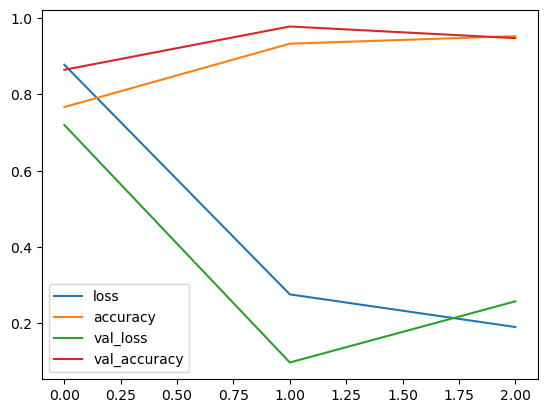

In [14]:
# Plotting the Graph
model_history = pd.DataFrame(history.history)
model_history.plot()

In [15]:
history2 = model.evaluate(test_generator)

27/27 [==============================] - 84s 3s/step - loss: 0.2481 - accuracy: 0.9419


In [16]:
# Image Data Generator
test_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)

test_generator = test_datagen.flow_from_directory(test,
                                                  target_size = (224, 224),
                                                  color_mode = "rgb",
                                                  shuffle = False,
                                                  class_mode = 'categorical',
                                                  batch_size = 1)

Found 860 images belonging to 43 classes.


In [17]:
activities = test_generator.class_indices
print(activities)

{'0': 0, '1': 1, '10': 2, '11': 3, '12': 4, '13': 5, '14': 6, '15': 7, '16': 8, '17': 9, '18': 10, '19': 11, '2': 12, '20': 13, '21': 14, '22': 15, '23': 16, '24': 17, '25': 18, '26': 19, '27': 20, '28': 21, '29': 22, '3': 23, '30': 24, '31': 25, '32': 26, '33': 27, '34': 28, '35': 29, '36': 30, '37': 31, '38': 32, '39': 33, '4': 34, '40': 35, '41': 36, '42': 37, '5': 38, '6': 39, '7': 40, '8': 41, '9': 42}


In [18]:
def get_activity(val):
    for key, value in activities.items():
        if val == value:
            return key
    return "Invalid"

In [19]:
filenames = test_generator.filenames
nb_samples = len(filenames)

In [20]:
predict = model.predict(test_generator, steps = nb_samples, verbose = 1)

860/860 [==============================] - 117s 132ms/step


In [21]:
y_pred = []
for val in predict:
    y_pred.append(get_activity(np.argmax(val)))

y_true = []
for file in filenames:
    y_true.append(file.split("\\")[0])

In [22]:
cm = confusion_matrix(y_true, y_pred)

print(precision_score(y_true, y_pred, average = 'macro',zero_division=1))
print(recall_score(y_true, y_pred, average = 'macro',zero_division=1))
print(f1_score(y_true, y_pred, average = 'macro',zero_division=1))

print(precision_score(y_true, y_pred, average = 'micro',zero_division=1))
print(recall_score(y_true, y_pred, average = 'micro',zero_division=1))
print(f1_score(y_true, y_pred, average = 'micro',zero_division=1))

0.9587452599080506
0.9418604651162791
0.9458352770850904
0.9418604651162791
0.9418604651162791
0.9418604651162791


In [23]:
# Making a Classification Report
print(classification_report(y_true, y_pred))

dataframe = pd.DataFrame(cm)
inv_dict = {v: k for k, v in activities.items()} 
dataframe = dataframe.rename(index = inv_dict)
dataframe = dataframe.rename(columns = inv_dict)

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        20
           1       0.94      0.85      0.89        20
          10       1.00      0.95      0.97        20
          11       0.90      0.95      0.93        20
          12       1.00      1.00      1.00        20
          13       1.00      1.00      1.00        20
          14       1.00      0.95      0.97        20
          15       1.00      0.90      0.95        20
          16       1.00      1.00      1.00        20
          17       1.00      0.90      0.95        20
          18       0.95      0.95      0.95        20
          19       1.00      0.85      0.92        20
           2       0.86      0.90      0.88        20
          20       1.00      0.95      0.97        20
          21       0.91      1.00      0.95        20
          22       1.00      1.00      1.00        20
          23       1.00      1.00      1.00        20
          24       0.95    

In [24]:
# Saving Conf# Saving Confusion Matrix in CSV format
dataframe.to_csv("C:/Users/saini/Desktop/new project/myData/Perfomance Confusion Matrix.csv")

In [25]:
cm

array([[20,  0,  0, ...,  0,  0,  0],
       [ 1, 17,  0, ...,  0,  0,  0],
       [ 0,  0, 19, ...,  0,  1,  0],
       ...,
       [ 0,  0,  0, ..., 14,  6,  0],
       [ 0,  0,  0, ...,  0, 20,  0],
       [ 0,  0,  0, ...,  0,  1, 19]], dtype=int64)

1/1 [==============================] - 3s 3s/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


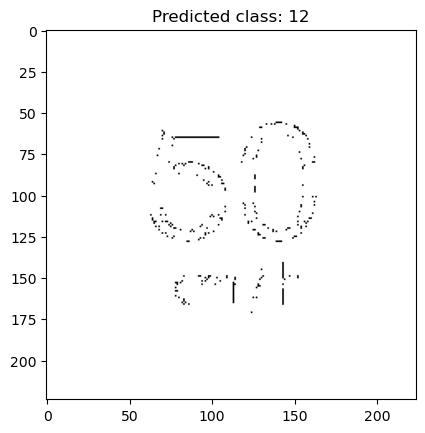

In [26]:
# Load the image
image = tf.keras.preprocessing.image.load_img('C:/Users/saini/Desktop/speed50.png', target_size=(224,224))
image = tf.keras.preprocessing.image.img_to_array(image)
image = np.expand_dims(image, axis=0)

# Preprocess the image
image = tf.keras.applications.efficientnet.preprocess_input(image)

# Make predictions
predictions = model.predict(image)

# Get the class label with the highest probability
predicted_class = np.argmax(predictions[0])

# Display the results
plt.imshow(image[0])
plt.title('Predicted class: {}'.format(predicted_class))
plt.show()

1/1 [==============================] - 0s 147ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


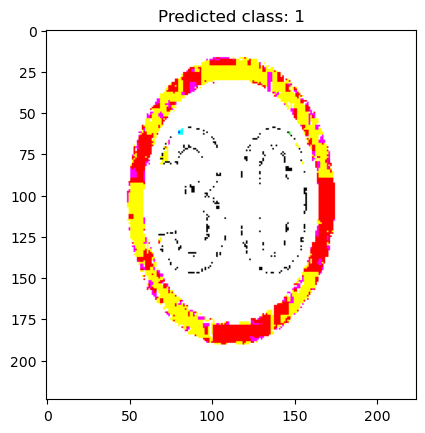

In [27]:
# Load the image
image = tf.keras.preprocessing.image.load_img('C:/Users/saini/Desktop/speed30.png', target_size=(224,224))
image = tf.keras.preprocessing.image.img_to_array(image)
image = np.expand_dims(image, axis=0)

# Preprocess the image
image = tf.keras.applications.efficientnet.preprocess_input(image)

# Make predictions
predictions = model.predict(image)

# Get the class label with the highest probability
predicted_class = np.argmax(predictions[0])

# Display the results
plt.imshow(image[0])
plt.title('Predicted class: {}'.format(predicted_class))
plt.show()